## Tutorial 9 
Tom Carron,
Clara Kretzschmar, 
& Timon Danowski

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from ex9 import *
matplotlib.rcParams["figure.dpi"]=200

In [2]:
N = 200
a, b = 0, 1 # Domain size
shock_loc = 0.5 #Shock location
'''
1: Left of the shock
2: right of the shock
'''
density_1, density_2 = 1, 0.125
pressure_1, pressure_2 = 1, 0.1
momentum_1, momentum_2 = 0, 0
t_max = 0.2
gamma = 1.4

# w = [rho, vx, vy, vz, p]
w_1 = [density_1, momentum_1, momentum_1, momentum_1, pressure_1]
w_2 = [density_2, momentum_2, momentum_2, momentum_2, pressure_2]
run_N=200

## Initial sod shock
Below we plot the initial shock set up and the density, pressure and x velocity at t=0.2. Comparing our plots to the plots in the tutorial sheet, we have a similar form but it deviates at the righ hand boundary of the system.

Text(0, 0.5, 'density')

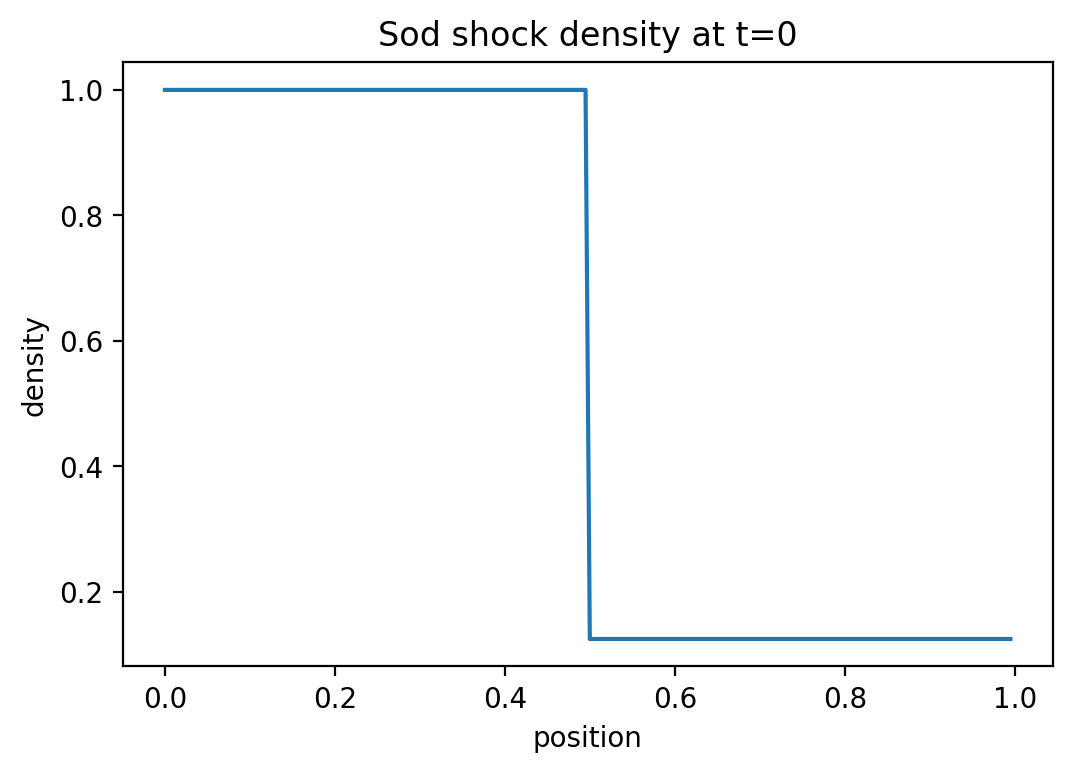

In [3]:
#Plot of initial setup
plt.plot(np.arange(a, b, dx(a, b, run_N)),initial(a, b, run_N, q_function(w_1, gamma), q_function(w_2, gamma), shock_loc)[:,0])
plt.title("Sod shock density at t=0")
plt.xlabel("position")
plt.ylabel("density")

In [4]:
Ns=[20,100,1000]
densities=[]
x_velocities=[]
energies=[]
pressures=[]
for i in range(len(Ns)):
    densities.append(np.zeros(Ns[i]))
    x_velocities.append(np.zeros(Ns[i]))
    energies.append(np.zeros(Ns[i]))
    pressures.append(np.zeros(Ns[i]))
    q=run(Ns[i], a, b, shock_loc, gamma, w_1, w_2, t_max)
    w=np.zeros_like(q)
    for k in range(Ns[i]):
        w[k]=invert_q(q[k],gamma)
    densities[i]=w[:,0]
    x_velocities[i]=q[:,1]
    energies[i]=q[:,4]
    pressures[i]=w[:,4]

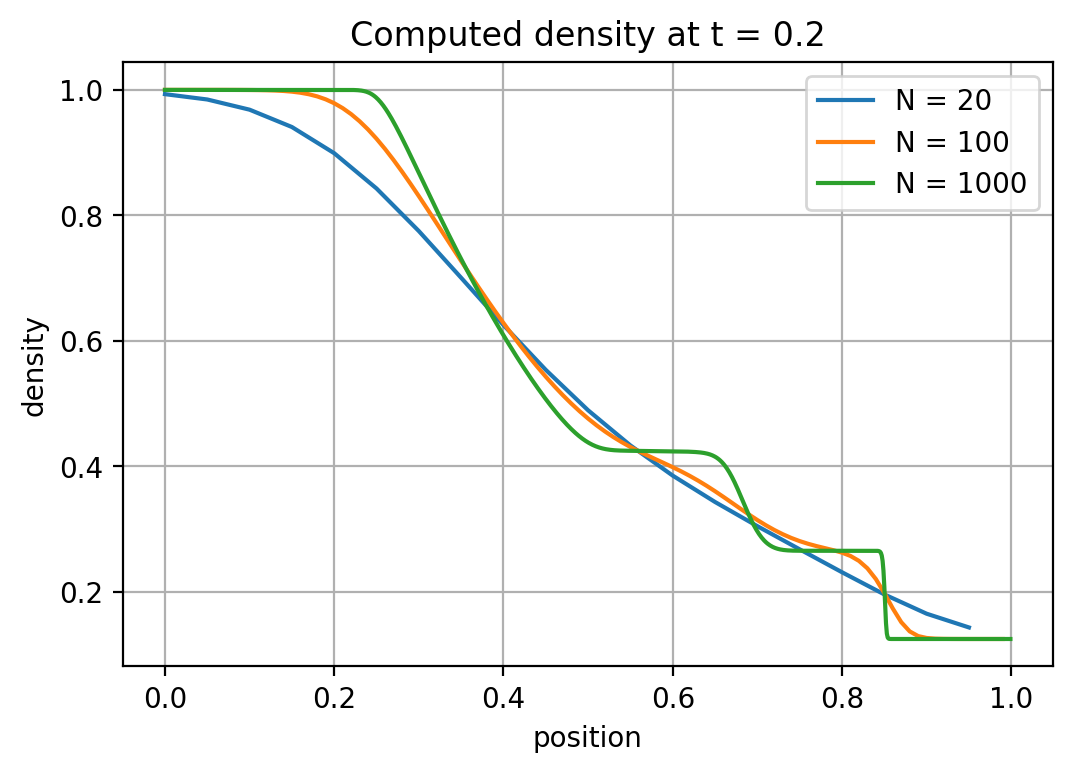

In [5]:
for i in range(len(Ns)):
    plt.plot(np.arange(a, b, dx(a, b, Ns[i])), densities[i],label="N = "+str(Ns[i]))
plt.title("Computed density at t = "+str(t_max))
plt.xlabel("position")
plt.ylabel("density")
plt.legend()
plt.grid()
plt.savefig("plots/density.png",dpi=300,bbox_inches="tight")

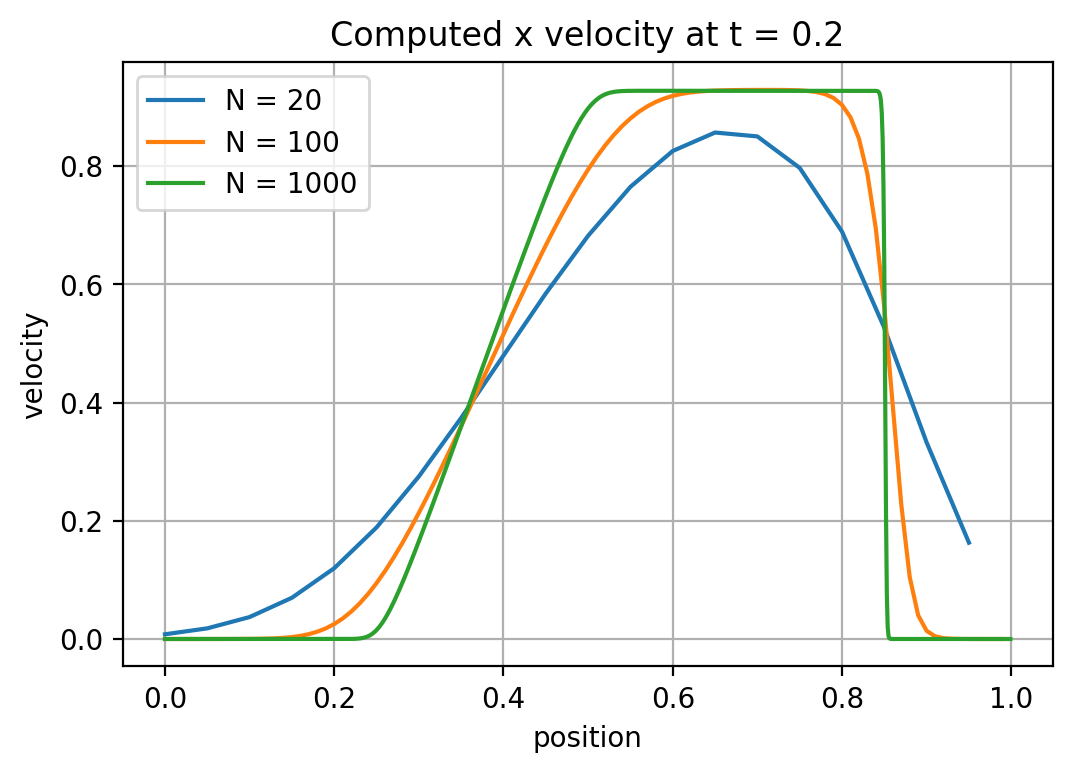

In [9]:
#x-velocity plot
for i in range(len(Ns)):
    plt.plot(np.arange(a, b, dx(a, b, Ns[i])), x_velocities[i]/densities[i],label="N = "+str(Ns[i]))
plt.title("Computed x velocity at t = "+str(t_max))
plt.xlabel("position")
plt.ylabel("velocity")
plt.legend()
plt.grid()
plt.savefig("plots/x_velocity.png",dpi=300,bbox_inches="tight")

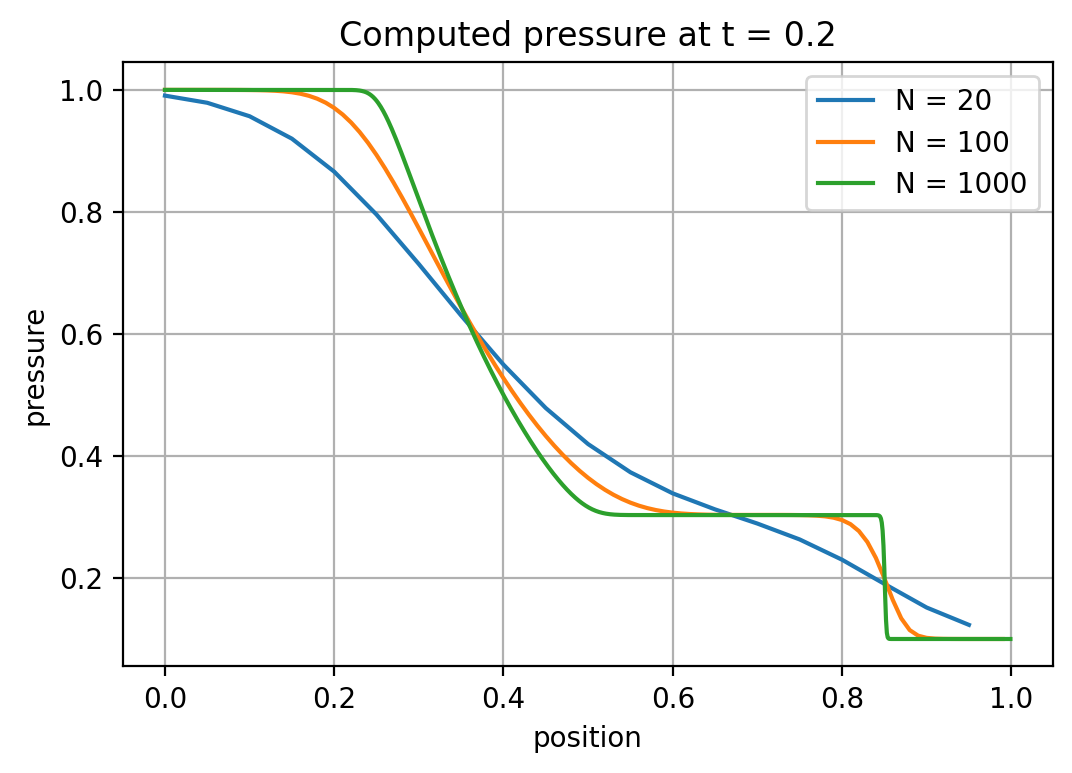

In [7]:
#pressure plot
for i in range(len(Ns)):
    plt.plot(np.arange(a, b, dx(a, b, Ns[i])), pressures[i],label="N = "+str(Ns[i]))
plt.title("Computed pressure at t = "+str(t_max))
plt.xlabel("position")
plt.ylabel("pressure")
plt.legend()
plt.grid()
plt.savefig("plots/pressure.png",dpi=300,bbox_inches="tight")




## Different end times

In [8]:
"""
times=[0.1,0.5,1]
for j in range(len(times)):
    Ns=[20,100,1000]
    densities=[]
    x_velocities=[]
    energies=[]
    pressures=[]
    for i in range(len(Ns)):
        densities.append(np.zeros(Ns[i]))
        x_velocities.append(np.zeros(Ns[i]))
        energies.append(np.zeros(Ns[i]))
        pressures.append(np.zeros(Ns[i]))
        q=run(Ns[i], a, b, shock_loc, gamma, w_1, w_2, times[j])
        w=np.zeros_like(q)
        for k in range(Ns[i]):
            w[k]=invert_q(q[k],gamma)
        densities[i]=w[:,0]
        x_velocities[i]=q[:,1]
        energies[i]=q[:,4]
        pressures[i]=w[:,4]
        plt.figure()
    for i in range(len(Ns)):
        plt.plot(np.arange(a, b, dx(a, b, Ns[i])), densities[i],label="N = "+str(Ns[i])+" t = "+str(times[j]))
    plt.title("Computed density at t = "+str(times[j]))
    plt.xlabel("position")
    plt.ylabel("density")
    plt.legend()
    plt.grid()
    plt.savefig("plots/density"+str(times[i])+".png",dpi=300,bbox_inches="tight")
    plt.figure()
    for i in range(len(Ns)):
        plt.plot(np.arange(a, b, dx(a, b, Ns[i])), x_velocities[i],label="N = "+str(Ns[i])+" t = "+str(times[j]))
    plt.title("Computed x velocity at t = "+str(times[j]))
    plt.xlabel("position")
    plt.ylabel("velocity")
    plt.legend()
    plt.grid()
    plt.savefig("plots/x_velocity"+str(times[i])+".png",dpi=300,bbox_inches="tight")
    #pressure plot
    plt.figure()
    for i in range(len(Ns)):
        plt.plot(np.arange(a, b, dx(a, b, Ns[i])), pressures[i],label="N = "+str(Ns[i])+" t = "+str(times[j]))
    plt.title("Computed pressure at t = "+str(times[j]))
    plt.xlabel("position")
    plt.ylabel("pressure")
    plt.legend()
    plt.grid()
    plt.savefig("plots/pressure"+str(times[i])+".png",dpi=300,bbox_inches="tight")
    """

'\ntimes=[0.1,0.5,1]\nfor j in range(len(times)):\n    Ns=[20,100,1000]\n    densities=[]\n    x_velocities=[]\n    energies=[]\n    pressures=[]\n    for i in range(len(Ns)):\n        densities.append(np.zeros(Ns[i]))\n        x_velocities.append(np.zeros(Ns[i]))\n        energies.append(np.zeros(Ns[i]))\n        pressures.append(np.zeros(Ns[i]))\n        q=run(Ns[i], a, b, shock_loc, gamma, w_1, w_2, times[j])\n        w=np.zeros_like(q)\n        for k in range(Ns[i]):\n            w[k]=invert_q(q[k],gamma)\n        densities[i]=w[:,0]\n        x_velocities[i]=q[:,1]\n        energies[i]=q[:,4]\n        pressures[i]=w[:,4]\n        plt.figure()\n    for i in range(len(Ns)):\n        plt.plot(np.arange(a, b, dx(a, b, Ns[i])), densities[i],label="N = "+str(Ns[i])+" t = "+str(times[j]))\n    plt.title("Computed density at t = "+str(times[j]))\n    plt.xlabel("position")\n    plt.ylabel("density")\n    plt.legend()\n    plt.grid()\n    plt.savefig("plots/density"+str(times[i])+".png",dpi